**Machine Learning Practice**

In [3]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [4]:
# read dataframe
df = pd.read_csv("/content/Salary_Data[1].csv")

# Drop rows with any NaN values
df = df.dropna()

# confirmation
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**In this example I will only use Years Of Experience feature to see how it affects employers' salary**

In [5]:
# remove all the other columns
df = df.drop(["Age", "Gender", "Education Level", "Job Title"], axis=1)

# confirmation
df.head(5)

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


**Now that the dataframe has all the attributes I need, I will create a visual representation of their correlation**

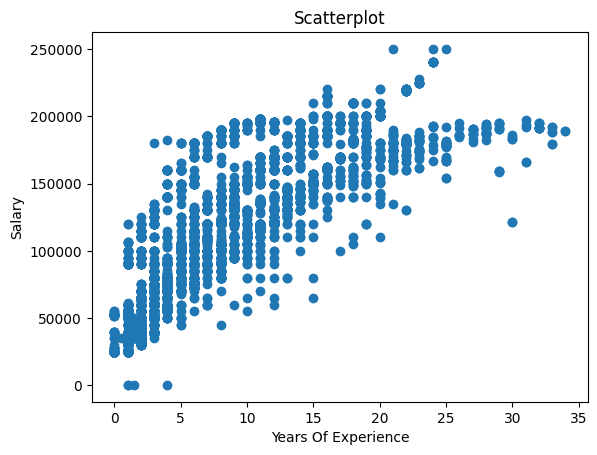

In [6]:
# scatterplot creation
plt.scatter(df["Years of Experience"], df["Salary"])

# scatterplot details
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Scatterplot")

# show
plt.show()

**It seems there is an ascending linear relationship between those two features**

**The next step is to create an optimal linear regression line**

In [7]:
# split the dataframe rows into training and testing ones
X = df["Years of Experience"]
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# confirmation
X_train.size


5358

In [9]:
X_test.size


1340

In [10]:
y_train.size

5358

In [11]:
y_test.size

1340

In [12]:
# create the linear regression model
lm = linear_model.LinearRegression()

In [13]:
# linear regression training
lm.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [14]:
# check the model's components
print(lm.coef_)

[7072.86168671]


In [15]:
print(lm.intercept_)

58196.21064922571


In [16]:
# check the model's R^2 score
print(lm.score(X_train.values.reshape(-1,1), y_train))

0.6540954906434074


**This means that:
If the employee has zero years of experience, his/her actual salary will be approximately 58,196 dollars. For each year of experience he/she has, 7,073 dollars will be added to the salary.
Also, R squared is 0.65, which means that the model (with only the "Years of Experience" feature) explains only the 65% of the total variation.**

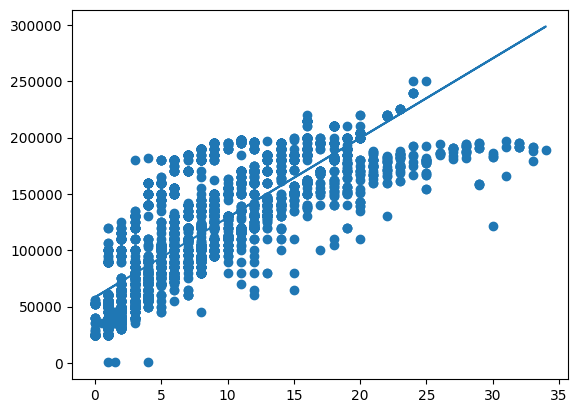

In [17]:
# create a visual representation of the linear model's line
slope = lm.coef_
intercept = lm.intercept_

def myfunc(x):
  return slope*x + intercept

mymodel = list(map(myfunc, X_train))

plt.scatter(X_train, y_train)
plt.plot(X_train, mymodel)
plt.show()

**Testing model's prediction ability**

In [22]:
# prediction
y_pred = lm.predict(X_test.values.reshape(-1,1))

for i in range(len(y_pred)):
  print(f"Predicted y = {y_pred[i]}, Actual y = {y_test.iloc[i]}")

Predicted y = 121851.9658295994, Actual y = 150000.0
Predicted y = 86487.65739605846, Actual y = 75969.0
Predicted y = 65269.072335933895, Actual y = 100000.0
Predicted y = 79414.79570935028, Actual y = 60000.0
Predicted y = 93560.51908276665, Actual y = 80000.0
Predicted y = 121851.9658295994, Actual y = 190000.0
Predicted y = 100633.38076947484, Actual y = 72000.0
Predicted y = 86487.65739605846, Actual y = 55000.0
Predicted y = 135997.6892030158, Actual y = 195000.0
Predicted y = 121851.9658295994, Actual y = 130000.0
Predicted y = 93560.51908276665, Actual y = 100000.0
Predicted y = 65269.072335933895, Actual y = 25000.0
Predicted y = 72341.93402264209, Actual y = 70000.0
Predicted y = 164289.13594984854, Actual y = 120000.0
Predicted y = 114779.10414289121, Actual y = 140000.0
Predicted y = 128924.82751630759, Actual y = 195000.0
Predicted y = 86487.65739605846, Actual y = 75000.0
Predicted y = 121851.9658295994, Actual y = 140000.0
Predicted y = 150143.41257643217, Actual y = 130

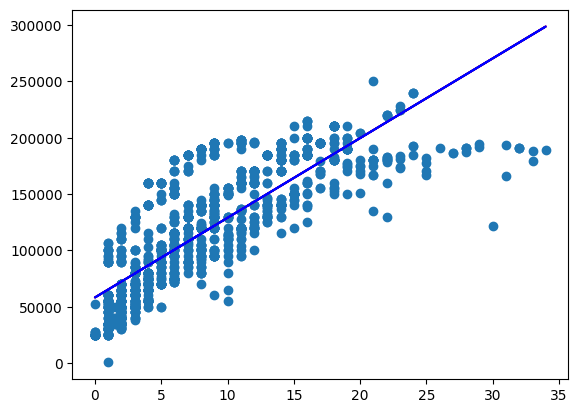

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="blue")
plt.show()